**Shapefile de ocorrências minerais**

Fonte do arquivo destrinchado:

*Projeto: ARIM Carajás: Evolução crustal e metalogenia da Província Mineral de Carajás. Arquivos vetoriais (shp) do Mapa de integração geológico-geofísica preliminar da ARIM Carajás. Escala 1:250.000, Sistema de Coordenadas Geográficas, Datum SIRGAS - 2000. (EPSG - 4674). Data da Publicação: 13/05/2019.* Link: http://rigeo.cprm.gov.br/jspui/handle/doc/19048


In [1]:
!pip install rasterio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 49.8 MB/s eta 0:00:00


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, glob, requests
import rasterio
import numpy as np
from pathlib import Path
from collections import OrderedDict

In [3]:
file_url = ["https://github.com/lszam/mineralexp/raw/refs/heads/main/data/Arim_Carajas/Ocorrencia_Mineral/arim_carajas_recmin.shx",
            "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/Arim_Carajas/Ocorrencia_Mineral/arim_carajas_recmin.dbf",
            "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/Arim_Carajas/Ocorrencia_Mineral/arim_carajas_recmin.prj",
            "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/Arim_Carajas/Ocorrencia_Mineral/arim_carajas_recmin.shp"]

for url in file_url:
  filename = os.path.basename(url)
  if not os.path.exists(filename):
    r = requests.get(url, allow_redirects=True)
    open(filename, 'wb').write(r.content)

In [4]:
# Input
input_path = "/content/arim_carajas_recmin.shp"
gdf = gpd.read_file(input_path)
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CODIGO_OBJ  171 non-null    int64         
 1   TOPONIMIA   171 non-null    object        
 2   LATITUDE    171 non-null    float64       
 3   LONGITUDE   171 non-null    float64       
 4   DATUM       171 non-null    object        
 5   MUNICIPIO   171 non-null    object        
 6   UF          171 non-null    object        
 7   PROVINCIA   0 non-null      object        
 8   METODO_GEO  171 non-null    object        
 9   DATA_CADAS  171 non-null    datetime64[ms]
 10  SUBS_PRINC  171 non-null    object        
 11  SUBS_SECUN  11 non-null     object        
 12  ASSOC_MINE  0 non-null      object        
 13  ASSOC_GEOQ  0 non-null      object        
 14  STATUS_ECO  171 non-null    object        
 15  GRAU_IMPOR  171 non-null    object        
 16  CLASSE_UTI  0 non-

In [5]:
# Filtrar texto do campo, com alternativas

def ocorrencias(codigo, termos):
    # Cria registro tipo 'Au|ouro'
    padrao = "|".join(termos)
    mask = gdf['SUBS_PRINC'].str.contains(padrao, case=False, na=False)
    subset = gdf[mask].copy()
    if subset.empty:
        print(f"⚠️ Nenhuma ocorrência de {codigo}")
    else:
        out_path = f"ocorrencias_{codigo}.shp"
        subset.to_file(out_path, driver="ESRI Shapefile", encoding="UTF-8")
        print(f"✅ {len(subset)} feições de {codigo} salvas em '{out_path}'")

import geopandas as gpd

input_path = "/content/arim_carajas_recmin.shp"
gdf = gpd.read_file(input_path)

# Converter DATA_CADAS para date (YYYY-MM-DD) para compatibilidade com Shapefile
gdf['DATA_CADAS'] = gdf['DATA_CADAS'].dt.date

substancias = {"Au": ["Au", "ouro"], "Ag": ["Ag", "prata"],
               "Cu": ["Cu", "cobre"], "Sn": ["Sn", "estanho"],
               "Ni": ["Ni", "niquel", "níquel"], "Fe": ["Fe", "ferro"],
                "Zn": ["Zn", "zinco"], "Mn": ["Mn", "manganes", "manganês"],
               "Pb": ["Pb", "chumbo"]
}

for cod, termos in substancias.items():
    ocorrencias(cod, termos)

✅ 26 feições de Au salvas em 'ocorrencias_Au.shp'
⚠️ Nenhuma ocorrência de Ag
✅ 51 feições de Cu salvas em 'ocorrencias_Cu.shp'
✅ 5 feições de Sn salvas em 'ocorrencias_Sn.shp'
✅ 3 feições de Ni salvas em 'ocorrencias_Ni.shp'
✅ 32 feições de Fe salvas em 'ocorrencias_Fe.shp'
⚠️ Nenhuma ocorrência de Zn
✅ 49 feições de Mn salvas em 'ocorrencias_Mn.shp'
✅ 1 feições de Pb salvas em 'ocorrencias_Pb.shp'


Printar símbolos a partir dos shapefiles

{'Sn': '/content/ocorrencias_Sn.shp', 'Ni': '/content/ocorrencias_Ni.shp', 'Cu': '/content/ocorrencias_Cu.shp', 'Au': '/content/ocorrencias_Au.shp', 'Pb': '/content/ocorrencias_Pb.shp', 'Fe': '/content/ocorrencias_Fe.shp', 'Mn': '/content/ocorrencias_Mn.shp'}
Sn: 5 ocorrências
Ni: 3 ocorrências
Cu: 51 ocorrências
Au: 26 ocorrências
Pb: 1 ocorrências
Fe: 32 ocorrências
Mn: 49 ocorrências


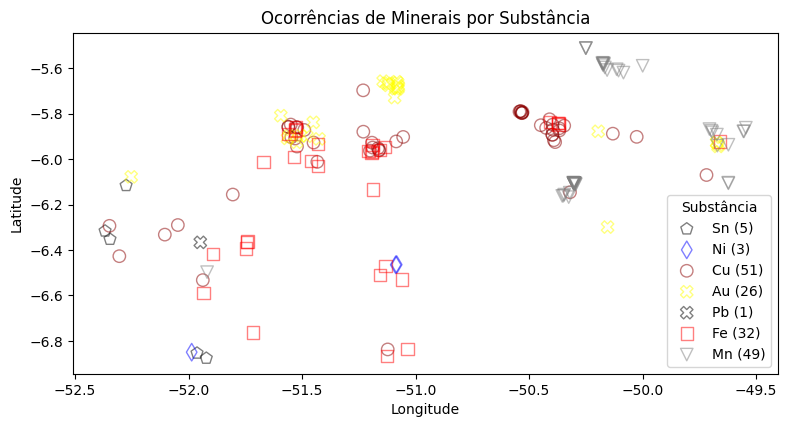

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

base_dir = "/content/"  # ajuste aqui
pattern  = os.path.join(base_dir, "ocorrencias_*.shp")
shps = {}
for shp_path in glob.glob(pattern):
    nome = os.path.splitext(os.path.basename(shp_path))[0]
    elemento = nome.split("_", 1)[1]
    shps[elemento] = shp_path
print(shps)

markers = {
    "Au": ["X","yellow"],
    "Ag": ["o","grey"],
    "Cu": ["o","darkred"],
    "Sn": ["p","black"],
    "Fe": ["s","red"],
    "Ni": ["d", "blue"],
    "Mn": ["v", "grey"],
    "Pb": ["X", "black"]
}

fig, ax = plt.subplots(figsize=(8, 6))

for cod, path in shps.items():
    gdf = gpd.read_file(path)
    n = len(gdf)
    print(f"{cod}: {n} ocorrências")
    if n == 0:
        continue

    xs = gdf.geometry.x
    ys = gdf.geometry.y
    m, col = markers[cod]

    ax.scatter(xs, ys, marker=m, facecolors="none", edgecolors=col, color=col,
               s=80, alpha=0.5,label=f"{cod} ({n})")

ax.set_title("Ocorrências de Minerais por Substância")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(title="Substância")
ax.set_aspect("equal", "box")
plt.tight_layout()
plt.show()


Mapa da Geologia simplificado

In [11]:
# Geologia
geo_url = ["https://github.com/lszam/mineralexp/raw/refs/heads/main/data/geotiff/mapa_geo_simples_2.tif",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/geotiff/mapa_geo_simples_2.tif.xml",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/geotiff/mapa_geo_simples.tif",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/geotiff/mapa_geo_simples.tif.xml",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/shp/estruturas_ln.shp",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/shp/estruturas_ln.dbf",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/shp/estruturas_ln.shx",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/shp/estruturas_ln.prj",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/shp/minas.shp",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/shp/minas.dbf",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/shp/minas.shx",
           "https://github.com/lszam/mineralexp/raw/refs/heads/main/data/shp/minas.prj"
           ]

for url in geo_url:
  filename = os.path.basename(url)
  if not os.path.exists(filename):
    r = requests.get(url, allow_redirects=True)
    open(filename, 'wb').write(r.content)

['#004080', '#008040', '#804040', '#808080', '#C0C0C0', '#E0C941', '#EAE1A6', '#FF0000', '#FF8080', '#FFFFFF']


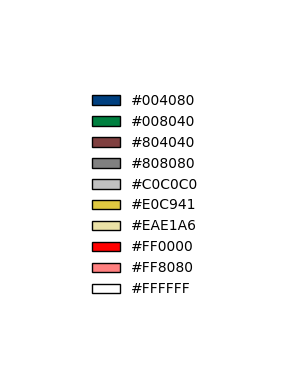

In [12]:
# Mapeamento das cores

geo_path = 'mapa_geo_simples.tif'

with rasterio.open(geo_path) as src:
    bands = src.read([1, 2, 3])
    # Transpose to (height, width, channels)
    img = np.transpose(bands, (1, 2, 0))
    raster_crs = src.crs
    bounds = src.bounds
pixels = img.reshape(-1, 3)
unique_colors = np.unique(pixels, axis=0)
# Normalizar para 255 e converter para hex
norm_colors = [(r/255, g/255, b/255) for r, g, b in unique_colors]
hex_codes = ['#%02X%02X%02X' % (r, g, b) for r, g, b in unique_colors]
print(hex_codes)

handles = [Patch(facecolor=nc, edgecolor='black') for nc in norm_colors]

fig = plt.figure(figsize=(3, len(handles)*0.4))
ax = fig.add_subplot(111)
ax.legend(handles, hex_codes, loc='center', frameon=False)
ax.axis('off')
plt.tight_layout()
plt.show()

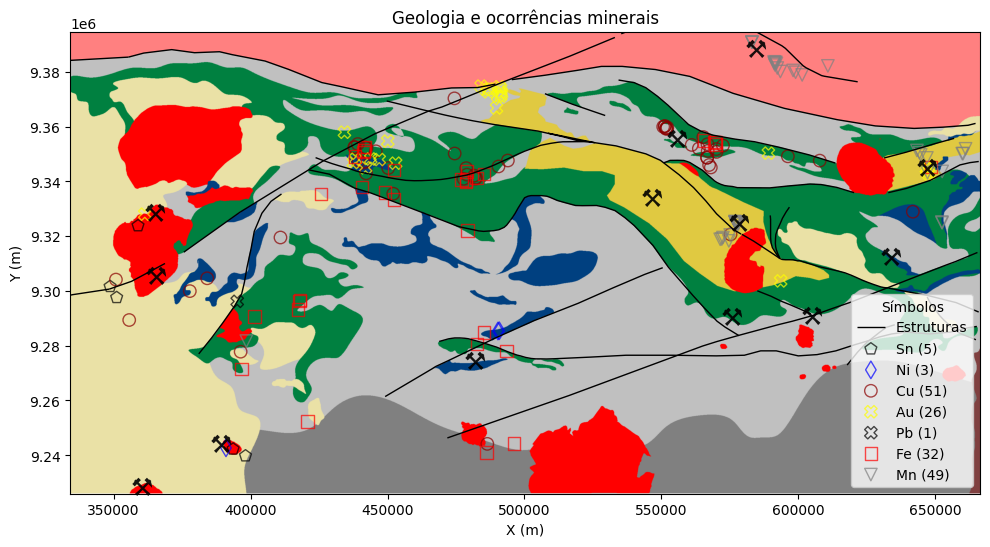

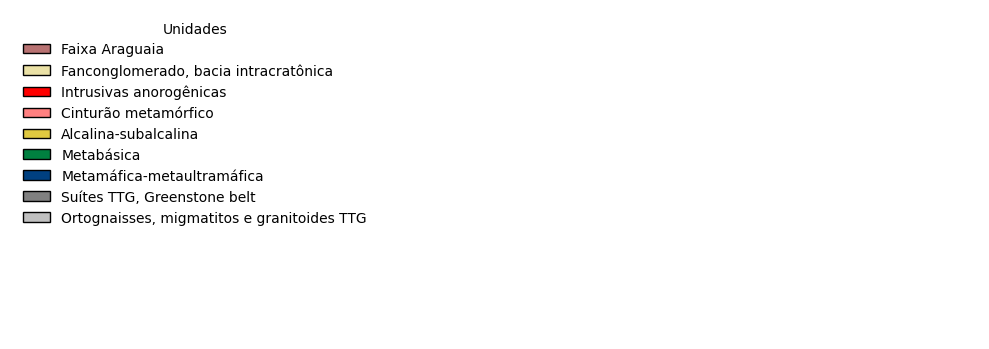

In [20]:
# Proxies para legenda da geologia
handles = [Patch(facecolor=nc, edgecolor='black') for nc in norm_colors]
labels = OrderedDict([
    ('#B87272', ["Faixa Araguaia", "Neoproterozoico"]),
    ('#E0C941', ["Alcalina‑subalcalina", "Neoarqueano"]),
    ('#008040', ["Metabásica", "Neoarqueano"]),
    ('#004080', ["Metamáfica‑metaultramáfica", "Neoarqueano"]),
    ('#808080', ["Suítes TTG, Greenstone belt", "Mesoarqueano"]),
    ('#C0C0C0', ["Ortognaisses, migmatitos e granitoides TTG", "Mesoarqueano"]),
    ('#EAE1A6', ["Fanconglomerado, bacia intracratônica", "Paleoproterozoico (Orosiriano)"]),
    ('#FF0000', ["Intrusivas anorogênicas", "Paleoproterozoico (Orosiriano)"]),
    ('#FF8080', ["Cinturão metamórfico", "Paleoproterozoico (Riaciano)"])
])
idade_rank = {
    "Mesoarqueano"     : 5,
    "Neoarqueano"      : 4,
    "Paleoproterozoico (Riaciano)"      : 3,
    "Paleoproterozoico (Orosiriano)"      : 2,
    "Neoproterozoico"  : 1
}

pares = []

for cor_hex, (litologia, idade) in labels.items():
    rank = idade_rank[idade]
    patch = Patch(facecolor=cor_hex,
                  edgecolor='black')
    rotulo = f"{litologia}"
    pares.append( (rank, patch, rotulo) )

# Ordenar do mais antigo para o mais jovem
pares.sort(key=lambda p: p[0])

# Montar handles e labels
handles = [p[1] for p in pares]
rotulos = [p[2] for p in pares]


estr_path = "estruturas_ln.shp"
gdf_estr = gpd.read_file(estr_path)
if gdf_estr.crs != raster_crs:
    gdf_estr = gdf_estr.to_crs(raster_crs)

gdf_minas = gpd.read_file("minas.shp")
if gdf_minas.crs != raster_crs:
    gdf_minas = gdf_minas.to_crs(raster_crs)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img, extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_title("Geologia e ocorrências minerais")
gdf_estr.plot(
    ax=ax,
    facecolor='none',
    edgecolor='black',
    linewidth=1,
    label="Estruturas"
)

for shp_path in glob.glob("ocorrencias_*.shp"):
    gdf = gpd.read_file(shp_path)

    if gdf.empty:
        continue

    if gdf.crs != raster_crs:
      gdf = gdf.to_crs(raster_crs)

    code = Path(shp_path).stem.replace("ocorrencias_", "")
    xs = gdf.geometry.x
    ys = gdf.geometry.y
    m, col = markers.get(code, ("o", "black"))

    if m in {"+", "x"}:
        ax.scatter(xs, ys, marker=m, c=col, s=80, alpha=0.5, label=f"{code} ({len(gdf)})")
    else:
        ax.scatter(xs, ys, marker=m, facecolors='none', edgecolors=col, s=80, alpha=0.7, label=f"{code} ({len(gdf)})")

mina = "⚒"
# Sobrepor picaretas em cada ponto
for x, y in zip(gdf_minas.geometry.x, gdf_minas.geometry.y):
    ax.text(x, y, mina, fontsize=18, ha="center", va="center",
            color="black", alpha=0.9, fontfamily="DejaVu Sans"
    )

ax.legend(title="Símbolos")
ax.set_aspect("equal", "box")
plt.tight_layout()
plt.savefig("geologia_ocorrencias.png", dpi=300)
plt.show()

# Legenda rochas
fig = plt.figure(figsize=(6, len(handles)*0.4))
ax = fig.add_subplot(111)
ax.legend(handles, rotulos, title="Unidades",
          frameon=False, loc='upper left')
ax.axis('off')
plt.tight_layout()
plt.savefig("geologia_legenda.png", dpi=300)
plt.show()


In [ ]:
# Download dos shp de ocorrencias
from google.colab import files

files_to_download = glob.glob("ocorrencias_*.*")  # qualquer extensão
for f in files_to_download:
    files.download(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>